In [1]:
# Commonly used libraries
from glob import glob
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt #Data visualization
import seaborn as sns # Datea visualization
import re # text processing 
from sklearn.preprocessing import MinMaxScaler, StandardScaler # normalization
from sklearn.preprocessing import LabelEncoder, OneHotEncoder # convert text data into numbers
from sklearn.decomposition import PCA # Dimensional Reduction
from sklearn.model_selection import train_test_split # cross validation 
from sklearn.model_selection import KFold # cross validation n parts
import cv2 # image processing
from pandas_ml import ConfusionMatrix # model evaluation metrics
from sklearn.metrics import classification_report, confusion_matrix # model evaluation metrics
from sklearn.metrics import auc, roc_curve # model evaluation
# deployment
import pickle
from sklearn.externals import joblib
%matplotlib inline

### Data Understanding
- Read Data
- Data Visualisation
- Descriptive Statistics
- Data Preprocessing
    - Data Cleaning
    - Imputing Missing Values
    - Normalization/Transformation
- Feature Engineering

In [2]:
# Reading data
data = pd.read_csv('./data/iris.csv')
data.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Flower
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
# Count missing values
data.isnull().sum().sum()

0

In [7]:
# Split into independent and dependent
# .values -> convert dataframe into arrays
X = data.iloc[:,:-1].values # independent variables
y = data.iloc[:,-1].values # dependent variables or target variables or labels or annotations

In [8]:
print('INFO: shape of X =',X.shape)
print('INFO: shape of y =',y.shape)

INFO: shape of X = (150, 4)
INFO: shape of y = (150,)


### Descriptive Statistics (Data Analysis & Visualisation)

### Data Preprocessing
- Normalization
    - MinMax Scaling

In [9]:
mmx = MinMaxScaler() # 0 -1 range
Xnorm = mmx.fit_transform(X) # normalise all values into 0 - 1 range
print('INFO: Xnorm =',Xnorm.shape)

INFO: Xnorm = (150, 4)


In [10]:
print('INFO: Xnorm maximum =',Xnorm.max())
print('INFO: Xnorm minimum =',Xnorm.min())

INFO: Xnorm maximum = 1.0
INFO: Xnorm minimum = 0.0


- Standard Scaling

In [12]:
sc = StandardScaler()
X_sc = sc.fit_transform(X)
print('INFO: X_sc =',X_sc.shape)

INFO: X_sc = (150, 4)


### Feature Engineering
- Backward Elimation 
- Forward Selection
- Dimension Reduction Technique (PCA)

In [13]:
pca = PCA() # initialize pca with all components
x_pca = pca.fit_transform(Xnorm) # Transform the matrix 
print('INFO: x_pca =',x_pca.shape)
print('INFO: Number of compoenets =',pca.n_components_)

INFO: x_pca = (150, 4)
INFO: Number of compoenets = 4


In [14]:
exvar = pca.explained_variance_ratio_ # explained variance for each pc (principal component)
cumvar = np.cumsum(exvar) # cumulative variance (R^2)

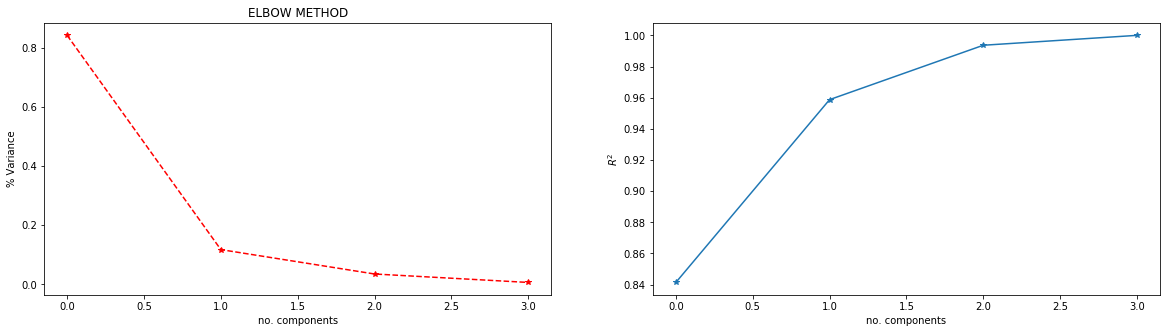

In [15]:
plt.figure(figsize=(20,5)) # 20x 5
plt.subplot(1,2,1) # plotting explained variance
plt.title('ELBOW METHOD')
plt.plot(exvar,'r*--'), plt.xlabel('no. components'), plt.ylabel('% Variance')
plt.subplot(1,2,2) # plotting R^2
plt.plot(cumvar,'*-'), plt.xlabel('no. components'), plt.ylabel('$R^2$')
plt.show()

From above plot and using **Elbow** method optimal number of components is around the variance of 
80% - 95%

In [17]:
pca = PCA(0.90) # initialize pca with all components
x_pca = pca.fit_transform(Xnorm) # Transform the matrix 
print('INFO: x_pca =',x_pca.shape)
print('INFO: Number of components =',pca.n_components_)

INFO: x_pca = (150, 2)
INFO: Number of components = 2


In [20]:
le = LabelEncoder()

In [21]:
y_le = le.fit_transform(y)

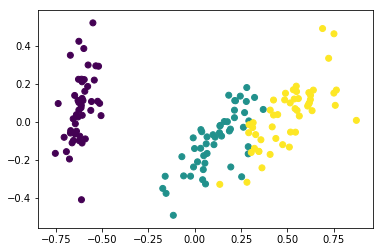

In [22]:
plt.scatter(x_pca[:,0],x_pca[:,1],c=y_le)

### Splitting Data 
- Traning
- Testing

In [23]:
x_train, x_test, y_train, y_test = train_test_split(x_pca,y,test_size = 0.2)
print('INFO: shape of x_train =',x_train.shape)
print('INFO: shape of x_test =',x_test.shape)
print('INFO: shape of y_train =',y_train.shape)
print('INFO: shape of y_test =',y_test.shape)

INFO: shape of x_train = (120, 2)
INFO: shape of x_test = (30, 2)
INFO: shape of y_train = (120,)
INFO: shape of y_test = (30,)


## Machine Learning Model
- Logistics Regresion

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
model_log = LogisticRegression()
model_knn = KNeighborsClassifier(n_neighbors=11)

In [46]:
model_log.fit(x_train,y_train) # model training
model_knn.fit(x_train,y_train) # model training
print('INFO: model train sucessfully')

INFO: model train sucessfully


C:\Users\Srikanth\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Srikanth\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


### Model Evalution

In [47]:
y_pred_test = model_log.predict(x_test)
y_pred_train = model_log.predict(x_train)

In [48]:
cm_train = ConfusionMatrix(y_train,y_pred_train)
cr_train = classification_report(y_train,y_pred_train)

In [49]:
cm_test = ConfusionMatrix(y_test,y_pred_test)
cr_test = classification_report(y_test,y_pred_test)

In [50]:
print(cm_train)

Predicted        Iris-setosa  Iris-versicolor  Iris-virginica  __all__
Actual                                                                
Iris-setosa               41                0               0       41
Iris-versicolor            0               30              11       41
Iris-virginica             0                3              35       38
__all__                   41               33              46      120


In [51]:
print(cm_test)

Predicted        Iris-setosa  Iris-versicolor  Iris-virginica  __all__
Actual                                                                
Iris-setosa                9                0               0        9
Iris-versicolor            0                7               2        9
Iris-virginica             0                1              11       12
__all__                    9                8              13       30


In [52]:
cm_test.classification_report

,precision,recall,F1_score,support
Classes,,,,
Iris-setosa,1,1,1,9
Iris-versicolor,0.875,0.777778,0.823529,9
Iris-virginica,0.846154,0.916667,0.88,12
__avg / total__,0.900962,0.9,0.899059,30


In [53]:
y_pred_test = model_knn.predict(x_test)
y_pred_train = model_knn.predict(x_train)

In [54]:
cm_train = ConfusionMatrix(y_train,y_pred_train)
cr_train = classification_report(y_train,y_pred_train)

In [55]:
cm_test = ConfusionMatrix(y_test,y_pred_test)
cr_test = classification_report(y_test,y_pred_test)

In [56]:
print(cm_train)

Predicted        Iris-setosa  Iris-versicolor  Iris-virginica  __all__
Actual                                                                
Iris-setosa               41                0               0       41
Iris-versicolor            0               38               3       41
Iris-virginica             0                2              36       38
__all__                   41               40              39      120


In [57]:
print(cm_test)

Predicted        Iris-setosa  Iris-versicolor  Iris-virginica  __all__
Actual                                                                
Iris-setosa                9                0               0        9
Iris-versicolor            0                8               1        9
Iris-virginica             0                1              11       12
__all__                    9                9              12       30


In [58]:
cm_test.classification_report

,precision,recall,F1_score,support
Classes,,,,
Iris-setosa,1,1,1,9
Iris-versicolor,0.888889,0.888889,0.888889,9
Iris-virginica,0.916667,0.916667,0.916667,12
__avg / total__,0.933333,0.933333,0.933333,30
